<a href="https://colab.research.google.com/github/Anonymous1846/ALL-Detection-Using-CNN/blob/master/ALL_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing All The Necessary Dependancies.**

In [ ]:
'''
Importing all the necessary dependencies for the Binary Classification model !
In the end we have verified the keras installtion, by printing out the keras version.
keras/tensorflow - for developing and training the DL(CNN) model !
os,random - for selection of the images from the directory !
'''
from keras.layers import MaxPooling2D,Conv2D,Dropout,Dense,Flatten,BatchNormalization,MaxPool2D #layers
from keras.preprocessing.image import ImageDataGenerator #for augmentation
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt # fow plotting 
import tensorflow as tf
import numpy as np
import keras
import os 
import random
from cv2 import imread

#causes an error if the keras installtion didn't went well !
print(keras.__version__)

2.4.3


# **Loading the Dataset(i.e Cancer cell images).**

In [ ]:
'''
The Images required for the training, validation, and testing is found in the /Architecture Datasets directory !
Architecture Datasets 
|
|
|
 ---- Training(80 %)
      |
      |
      ----Normal 
      |
      ----Blasts
|
|
---- Validation (10 %)
      |
      |
      ----Normal 
      |
      ----Blasts
|
|
---- Testing (10 %)
      |
      |
      ----Normal 
      |
      ----Blasts
'''
training_data_path="/content/drive/MyDrive/Architecture Datasets/Training"
validation_data_path="/content/drive/MyDrive/Architecture Datasets/Validation"
print(f'The Training Images Path :{training_data_path}')
print(f'The Validation Images Path :{validation_data_path}')



The Training Images Path :/content/drive/MyDrive/Architecture Datasets/Training
The Validation Images Path :/content/drive/MyDrive/Architecture Datasets/Validation


# **Image Preprocessing**

In [ ]:
'''
ALL-IDB1 and ALL IDB2 both contains roughly 334 images, but after spiltting of the images,
the size becomes significantly low, and this leads significant amount of overfitting.
So, inorder to solve the problem of overfitting, we have to apply data augmentation to 
increase the number of images, from the previous existing images !
'''
training_images_preprocessed=ImageDataGenerator(rescale=1./255,
                                                rotation_range=40,
                                                horizontal_flip=True,
                                                fill_mode='nearest')
validate_images_preprocessed=ImageDataGenerator(rescale=1./255,rotation_range=40)


# **Applying the Image Augmentation to Training and Validation Set !**

In [ ]:
'''
The function augments the data, according to the processing mode.
The processing mode has defined earlier seperately for training and validation set !

params:training/validation directory

return:augmented data 
'''
def apply_augmentation(data_directory,processing_mode):
  data_gen=validate_images_preprocessed.flow_from_directory(
        data_directory,  # the directory as provided to the function as an arguement !
        target_size=(300, 300),  # 300x 300 pixels 
        batch_size=128,
        class_mode='binary')
  return data_gen

training_images_datagen=apply_augmentation(training_data_path,training_images_preprocessed)
valid_images_datagen=apply_augmentation(validation_data_path,validate_images_preprocessed)


Found 268 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


#**Using the mean pixel we have calculated the number of features !**

In [ ]:
sample_image0=imread('/content/drive/MyDrive/Architecture Datasets/Training/Blasts/Im031_1.jpg')
sample_image1=imread('/content/drive/MyDrive/Architecture Datasets/Training/Normal/Im081_0.jpg')
print("The diemensions of the cancer cell: {}".format(sample_image0.shape))
print("The diemensions of the normal cell: {}".format(sample_image1.shape))
feature_matrix0 = np.zeros((sample_image0.shape[0], sample_image0.shape[1])) # for cancer cell
feature_matrix1 = np.zeros((sample_image1.shape[0], sample_image1.shape[1])) #for normal cell
'''
The function will calculate the mean pixels values which are essential in understanding the number of possible 
values/ features in the image !

params: fetaure matrix and image

return: None
'''
def show_features(feature_matrix,img):
  for i in range(1,img.shape[0]):
    for j in range(1,img.shape[1]):
        feature_matrix[i][j] = ((int(img[i,j,0]) + int(img[i,j,1]) + int(img[i,j,2]))/3) # mean for three channels !

  features = np.reshape(feature_matrix, (img.shape[0]*img.shape[1])) 
  print("The mean pixels values: {}".format(features.shape))
show_features(feature_matrix0,sample_image0) # for cancer cell 
show_features(feature_matrix1,sample_image1) # for normal cell

The diemensions of the cancer cell: (1368, 1712, 3)
The diemensions of the normal cell: (1944, 2592, 3)
The mean pixels values: (2342016,)
The mean pixels values: (5038848,)


# **Representation of Images.**

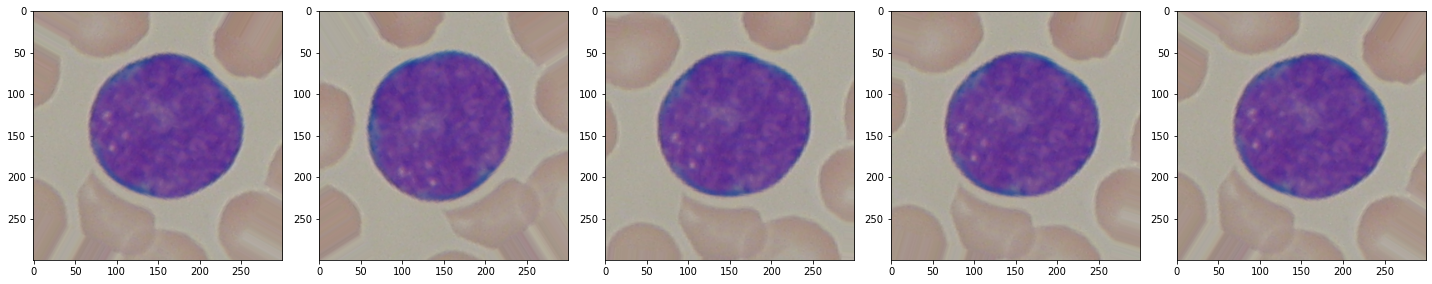

In [ ]:
'''
The function is used to plot the augmented figures of the images, for visual demonstartion !

params:image object
return: 5 plotted images
'''
def plot(image):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for imag,axis in zip(image,axes):
    #the zip function takes two params(iteratables and combines then to form a list of tuples !)
    axis.imshow(imag)
  plt.tight_layout()
  plt.show()

training_images_datagen.class_indices
sample_images=[training_images_datagen[0][0][0] for i in range(5)]
plot(sample_images)

# **Binary CNN Classifier !**

In [ ]:
'''
The CNN model is used to predict whether the given data image is cancerous or not,
it contains 5 convolution and corresponding number of maxpooling layers.
RelU function is added to each layer so that it can introduce non-linearity and 
avoid the negative values !
'''
the_binary_cnn_model0=Sequential([
                                    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), # relu function is used to negate the negative values from the models, replace them with zeros !
                                    MaxPooling2D(2, 2),
                                    # The second convolution
                                    Conv2D(32, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # The third convolution
                                    Conv2D(64, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # The fourth convolution
                                    Conv2D(64, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # The fifth convolution
                                    Conv2D(64, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # Flatten the  results to feed into a DNN
                                    Flatten(),
                                    # 512 neuron hidden layer
                                    Dense(512, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 0 for the other 'cancer'
                                    Dense(1, activation='sigmoid') # the output will be the range of -1 and 1(graph will be S shaped !)
                                        ])


'''
Implementation of the AlexNet architecture, which is an common architecture of the CNN model
'''

alexnet_model =Sequential([
                    Conv2D(32, (11, 11), activation='relu', input_shape=(300, 300, 3)),
                    MaxPooling2D((3, 3)),
                    Conv2D(64, (5, 5), activation='relu'),
                    MaxPooling2D((3, 3)),
                    Conv2D(128, (3, 3), activation='relu'),
                    Conv2D(256, (3, 3), activation='relu'),
                    Conv2D(512, (3, 3), activation='relu'),
                    MaxPooling2D((3, 3)),
                    Flatten(),
                    Dense(4096, activation='relu'),# two sense layers with 4096 nuerons each 
                    Dense(4096, activation='relu'),
                    Dense(1, activation='sigmoid')# sigmoid used to binary other wise softmax will be used for probabilitic classification!



])

# **Model Overview**

In [ ]:
alexnet_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 290, 290, 32)      11648     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 92, 92, 64)        51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 256)       295168    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 512)      

# **Compile the model**

In [ ]:
'''
Compiling the model using the loss function binary crossentropy !
'''
alexnet_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
#the_binary_cnn_model0.save('Binary_Model0.h5')

# **Training the datset based on the Binary CNN model 0**

In [ ]:
#the steps per epoch is set to 2, but cannot be set to more than 3(because of error !)
the_final_train = alexnet_model.fit(
                      training_images_datagen,
                      batch_size=10,
                      validation_data=valid_images_datagen,
                      steps_per_epoch=3,  
                      epochs=100,
                      verbose=1,
                    )


Epoch 1/100
3/3 [==============================] - 25s 4s/step - loss: 628.3605 - accuracy: 0.4245 - val_loss: 0.7899 - val_accuracy: 0.5455
Epoch 2/100
3/3 [==============================] - 12s 3s/step - loss: 0.7540 - accuracy: 0.5314 - val_loss: 0.6721 - val_accuracy: 0.5455
Epoch 3/100
3/3 [==============================] - 12s 6s/step - loss: 0.7457 - accuracy: 0.4506 - val_loss: 1.0420 - val_accuracy: 0.4545
Epoch 4/100
3/3 [==============================] - 12s 3s/step - loss: 0.8391 - accuracy: 0.5293 - val_loss: 1.2063 - val_accuracy: 0.5455
Epoch 5/100
3/3 [==============================] - 12s 4s/step - loss: 1.0431 - accuracy: 0.5244 - val_loss: 0.6904 - val_accuracy: 0.5455
Epoch 6/100
3/3 [==============================] - 12s 4s/step - loss: 0.6902 - accuracy: 0.5256 - val_loss: 0.9595 - val_accuracy: 0.5455
Epoch 7/100
3/3 [==============================] - 12s 6s/step - loss: 0.8156 - accuracy: 0.5085 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 8/100
3/3 [========

# **Accuracy and Loss Graph !**

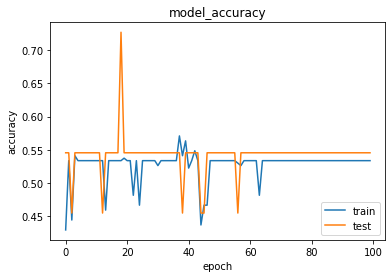

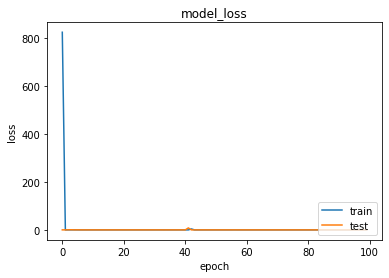

In [ ]:
'''
The accuracy and the losses at each iteration/epoch is evaluated in the graph below
matlabplotlib is used for plotting.
 
'''

plt.plot(the_final_train.history['accuracy'])
plt.plot(the_final_train.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

plt.plot(the_final_train.history['loss'])
plt.plot(the_final_train.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

#**Testing for Cancer vs Normal**

In [ ]:
def check_for_cancer(image_path):
  img = image.load_img(image_path, target_size=(300, 300)) # loading the image in 300x300 diemensions 
  img = image.img_to_array(img) #converting to array 
  img = np.expand_dims(img, axis=0)#expanding along one axis 


  classes = the_binary_cnn_model0.predict(img).round(3) #the array is passed to the model for prediction
  print(classes)
  if classes[0]<0.5:
      return "Cancer cell"
  else:
      return "Normal cell"
 
print(check_for_cancer('/content/drive/MyDrive/Architecture Datasets/Testing/Blasts/Im001_1.jpg'))
print(check_for_cancer('/content/drive/MyDrive/Architecture Datasets/Testing/Normal/Im070_0.jpg'))
print(check_for_cancer('/content/drive/MyDrive/Architecture Datasets/Testing/Blasts/Im001_1.tif'))
print(check_for_cancer('/content/drive/MyDrive/Architecture Datasets/Testing/Normal/Im073_0.jpg'))

[[0.]]
Cancer cell
[[0.]]
Cancer cell
[[0.]]
Cancer cell
[[0.]]
Cancer cell
